In [114]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [115]:
# helper functions

def series_append(series, list, keys):
    for i in range(64):
        series[keys[i]].append(float(list[i]))
    return series

def load_series(filename):
    with open(filename, 'r') as csv_in:
        csv_file = list(csv.reader(csv_in))
        series = {}
        # print(len(csv_file))
        keys = csv_file[0]
        for key in keys: series[key] = []
        for i in range(2, len(csv_file), 2):
            # print(len(csv_file[i]))
            series = series_append(series, csv_file[i], keys)
        return [series, int((len(csv_file) - 2) / 2)]

def xyz_centroids(series, i):
    x_sum = 0.0
    y_sum = 0.0
    z_sum = 0.0
    for key in series:
        if (key[-1] == 'x'):
            x_sum += series[key][i]
        elif (key[-1] == 'y'):
            y_sum += series[key][i]
        elif (key[-1] == 'z'):
            z_sum += series[key][i]
    x_sum /= 16.0
    y_sum /= 16.0
    z_sum /= 16.0
    return [x_sum, y_sum, z_sum]

def moving_average(input_list, step_size):
    final_list = []
    for i in range(int((step_size - 1) / 2)):
        final_list.append(None)
    interval_start = 0
    interval_end = int(step_size - 1)
    while (interval_end < len(input_list)):
        final_list.append(int(float(sum(input_list[interval_start : interval_end + 1])) / float(step_size)))
        interval_start += 1
        interval_end += 1
    for i in range(int((step_size - 1) / 2)):
        final_list.append(None)
    return final_list
    


In [155]:
sr_filepath = '..\\time_series\\supplement\\'
sr_files = os.listdir(sr_filepath)

ws_filepath = '..\\time_series\\web_scrape\\'
ws_files = os.listdir(ws_filepath)

# print(sr_files)

x_list = []
y_list = []

orig_x_list = []
orig_y_list = []

centroid_list_x = []
centroid_list_y = []

for ws_csv in ws_files:
    if ('0128' not in ws_csv):
        continue
    filename = ws_filepath + ws_csv
    series, num_frames = load_series(filename)
    # print(num_frames)
    # print(series)

    for key in series:
        if (key[-1] == 'x'):
            orig_x_list.append(series[key][4])
        elif (key[-1] == 'y'):
            orig_y_list.append(series[key][4])

    '''for frame in range(num_frames):
        x_cent, y_cent, z_cent = xyz_centroids(series, frame)
        centroid_list_x.append(x_cent)
        centroid_list_y.append(y_cent)
        for key in series:
            # x_list.append
            if (key[-1] == 'x'):
                series[key][frame] -= x_cent
            elif (key[-1] == 'y'):
                series[key][frame] -= y_cent
            elif (key[-1] == 'z'):
                series[key][frame] -= z_cent'''

    break


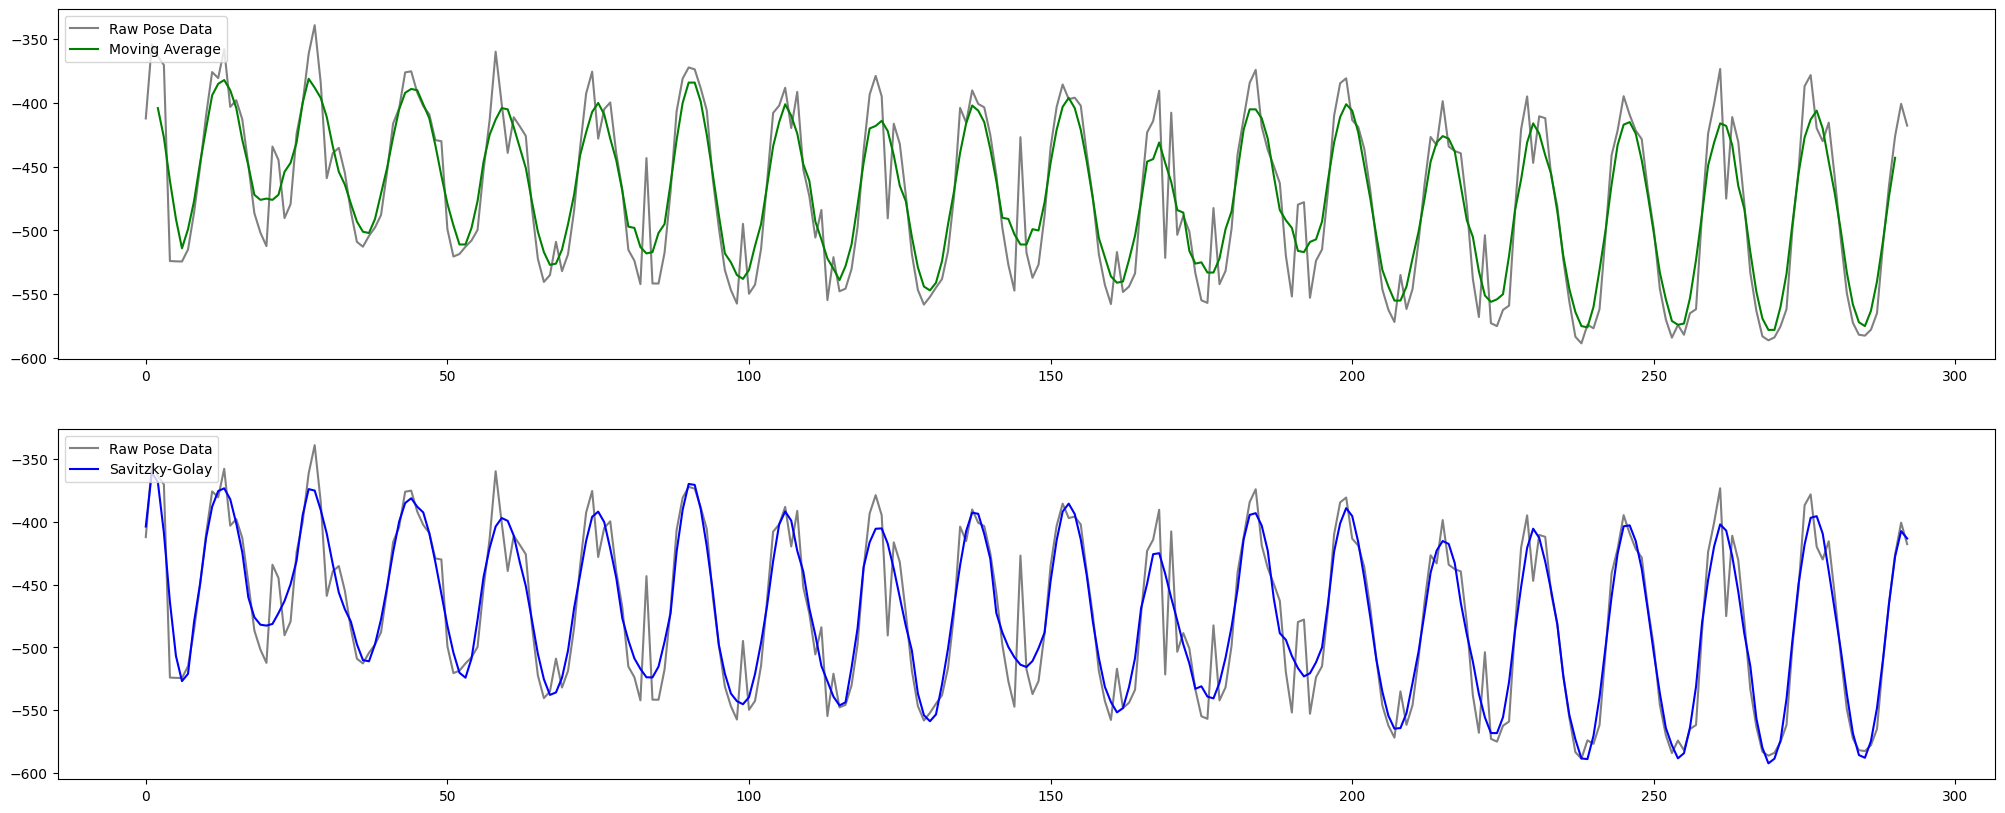

In [156]:

# visualization

fig, (ax1, ax2) = plt.subplots(2, figsize=(25, 10))
# plt.scatter(np.arange(0, num_frames), centroid_list_y)
ax1.plot(np.arange(0, num_frames), series['left_heel_y'], color='gray', label='Raw Pose Data')
ax2.plot(np.arange(0, num_frames), series['left_heel_y'], color='gray', label='Raw Pose Data')
ax1.plot(np.arange(0, num_frames), moving_average(series['left_heel_y'], 5), color='green', label='Moving Average')
ax1.legend(loc='upper left')
ax2.plot(np.arange(0, num_frames), savgol_filter(series['left_heel_y'], window_length=9, polyorder=3), color='blue', label='Savitzky-Golay')
ax2.legend(loc='upper left')
plt.show()


# print(x_list)
# print(y_list)


# print(series)